In [26]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation∏
from scipy.signal import savgol_filter #Smo oth
import math
from math import dist
import time

#import cv2

import random
from IPython import display
# aka import ipympl
from scipy.signal import savgol_filter #Smooth
from scipy.optimize import curve_fit,fmin

import struct


In [3]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

# Compton edge calcualtion

In [4]:
def compton_edge(gamma_E):
    E_edge = gamma_E*(1-(1+(gamma_E/0.511))**-1)
    return(E_edge)
def LO_to_channel(LO,channel):
    return()

In [24]:
def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

In [23]:
compton_edge(4.4)

3.9421706373447365

# Import file

In [62]:
Ch4_Cs_137_data = np.loadtxt('../../../data/HV_calibration/HV1600-850/CH4@DT5730B_1173_Espectrum_20220211_C137_Ch0_3in30cm_HV1600_Ch4_2in30cm_Ch6_2in30cmHV850_TH35_24hours_20230212_173324.txt')
Ch4_Co60_data = np.loadtxt('../../../data/HV_calibration/HV1600-850/Spectrum_CH4@DT5730B_1173_20220210_Co60_Ch0_3in30cm_HV1600_Ch4_2in30cm_Ch6_2in30cmHV850_TH35_24hours.txt')
#Ch6_data = np.loadtxt('../../../data/HV_calibration/Spectrum_CH6@DT5730B_1173_20221124_TH3535_Co60_ch0_3inches_66ns_HV1600_d30cm_Ch4A6B_2inches_66ns_HV850_8hrs.txt')


In [63]:
print(len(Ch4_Cs_137_data))

16383


(0.0, 500.0)

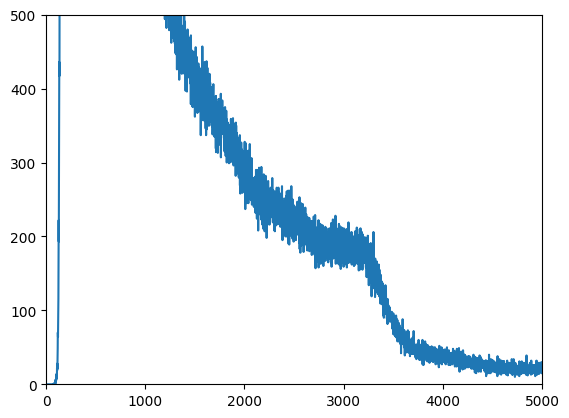

In [69]:
x_axis =np.arange(0,len(Ch4_Cs_137_data),1)

#plt.plot(x_axis,Ch4_Cs_137_data)

plt.plot(x_axis,Ch4_Co60_data)
plt.xlim(0,5000)
plt.ylim(0,500)

#  Smooth the Curve

(0.0, 4000.0)

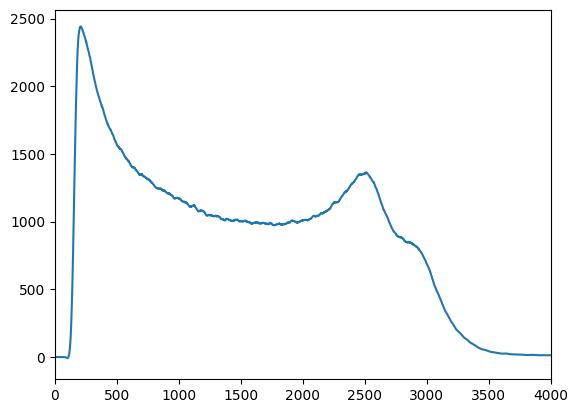

In [8]:
Ch0_smoothed = savgol_filter(Ch4_data, 71, 3) 

plt.plot(x_axis,Ch0_smoothed)
plt.xlim(0,4000)

[1357.9180806  2481.73981627  263.66184999]
2776.2501027097956


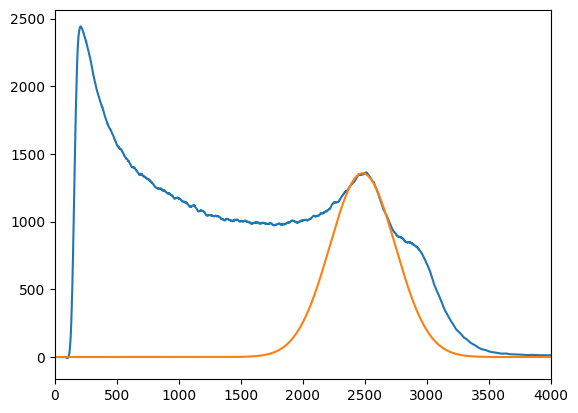

In [52]:
popt=gauss_fit_wo_baseline(x_axis[2450:2700],Ch0_smoothed[2450:2700])
print(popt)
plt.plot(x_axis,Ch0_smoothed)
plt.xlim(0,4000)
plt.plot(x_axis,gauss_wo_baseline(x_axis,popt[0],popt[1],popt[2]))
compton_edge_1173 = popt[1]+1.117*popt[2]
print(compton_edge_1173)

[ 869.82652348 2819.14143371  249.79796048]
3098.1657555595516


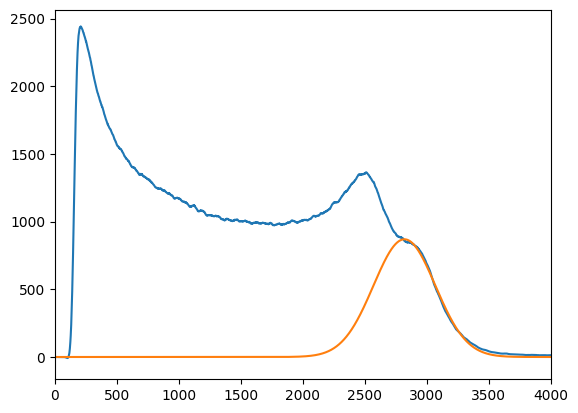

In [46]:
popt=gauss_fit_wo_baseline(x_axis[2800:3500],Ch0_smoothed[2800:3500])
print(popt)
plt.plot(x_axis,Ch0_smoothed)
plt.xlim(0,4000)
plt.plot(x_axis,gauss_wo_baseline(x_axis,popt[0],popt[1],popt[2]))
compton_edge_1332 = popt[1]+1.117*popt[2]
print(compton_edge_1332)

(-20.0, 10.0)

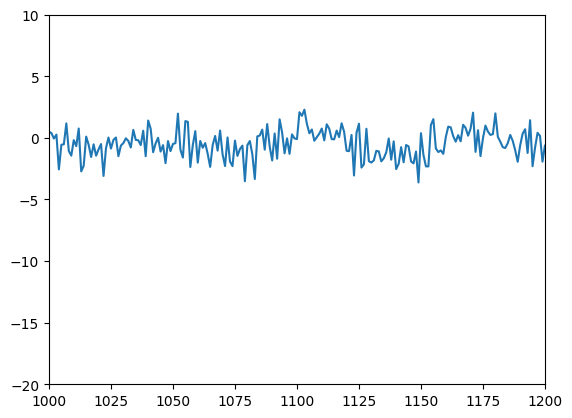

In [9]:
Ch0_diff = np.diff(Ch0_smoothed, n=1)
plt.plot(x_axis[:-1],Ch0_diff)
plt.xlim(1000,1200)
plt.ylim(-20,10)

(-20.0, 10.0)

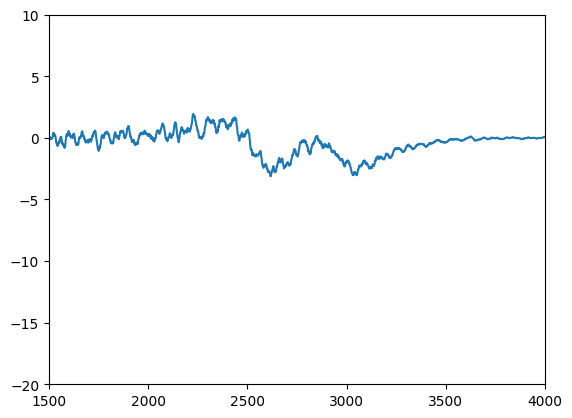

In [16]:
Ch0_diff_smoothed = savgol_filter(Ch0_diff, 31, 3) 

plt.plot(x_axis[:-1],Ch0_diff_smoothed)
plt.xlim(1500,4000)
plt.ylim(-20,10)


In [17]:
2324, 2692

(2324, 2692)

In [18]:
print(np.min(Ch0_diff_smoothed[2000:3000]))
print(np.argmin(Ch0_diff_smoothed[2400:2700]))
print(np.argmin(Ch0_diff_smoothed[2700:3000]))

-3.1056174806614645
216
289


In [74]:
print(2317*1.332/1.173)

2631.0690537084397


In [53]:
#1.173
0.817/2776

0.00029430835734870316

In [47]:
#1.332
0.9626/3098

0.0003107165913492576

In [81]:
#0.662
0.3736/1097

0.0003405651777575205

In [10]:
Ch0_diff = np.diff(Ch0_data, n=1)
plt.plot(x_axis[:-1],Ch0_diff)

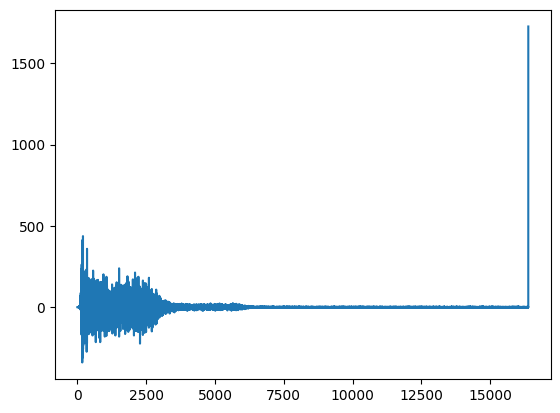

In [ ]:
PSD54 = np.loadtxt('3in_PSD_20221021_TH3535_ch0_3inches_54ns_HV1550_d30cm_Ch2_2inches_54ns_30cm_HV800.txt')
PSD60 = np.loadtxt('3in_PSD_20221021_TH3535_ch0_3inches_60ns_HV1550_d30cm_Ch2_2inches_60ns_30cm_HV800.txt')
PSD68 = np.loadtxt('3in_PSD_20221021_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_.txt')
PSD70 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_70ns_HV1550_d30cm_Ch2_2inches_70ns_30cm_HV800.txt')
PSD74 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_74ns_HV1550_d30cm_Ch2_2inches_74ns_30cm_HV800.txt')
PSD80 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_80ns_HV1550_d30cm_Ch2_2inches_80ns_30cm_HV800.txt')
PSD84 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_84ns_HV1550_d30cm_Ch2_2inches_84ns_30cm_HV800.txt')
PSD88 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_88ns_HV1550_d30cm_Ch2_2inches_88ns_30cm_HV800.txt')
PSD92 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_92ns_HV1550_d30cm_Ch2_2inches_92ns_30cm_HV800.txt')
PSD96 = np.loadtxt('3in_PSD_20221022_TH3535_ch0_3inches_96ns_HV1550_d30cm_Ch2_2inches_96ns_30cm_HV800.txt')

OSError: 3in_PSD_20221021_TH3535_ch0_3inches_54ns_HV1550_d30cm_Ch2_2inches_54ns_30cm_HV800.txt not found.

In [ ]:
for i in [60,62,64,66,68,70]:
    print(i)
    globals()["PSD"+str(i)]= np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_'+str(i)+'ns_HV1550_d30cm_Ch2_2inches_'+str(i)+'ns_30cm_HV800.txt')

60
62
64
66
68
70


In [ ]:
#PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_.txt')
PSD68 = np.loadtxt('../../../data/PSD_optimization/3in_PSD_20221022_TH3535_ch0_3inches_68ns_HV1550_d30cm_Ch2_2inches_68ns_30cm_HV800_2.txt')




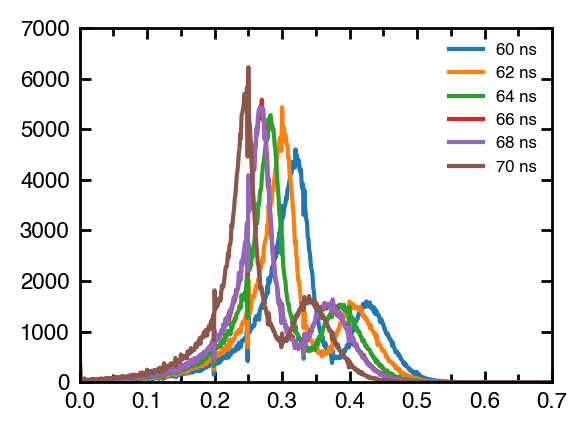

In [ ]:
fig = fig_pre_def(6,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)
xaxis=np.arange(0,1,0.001)

ax.plot(xaxis,PSD60,label = '60 ns')
ax.plot(xaxis,PSD62,label = '62 ns')
ax.plot(xaxis,PSD64,label = '64 ns')
ax.plot(xaxis,PSD66,label = '66 ns')
ax.plot(xaxis,PSD68,label = '68 ns')
ax.plot(xaxis,PSD70,label = '70 ns')
#ax.plot(xaxis,PSD74,label = '74 ns')
#ax.plot(xaxis,PSD80,label = '80 ns')
#ax.plot(xaxis,PSD84,label = '84 ns')
#ax.plot(xaxis,PSD88,label = '88 ns')
#ax.plot(xaxis,PSD92,label = '92 ns')
#ax.plot(xaxis,PSD96,label = '96 ns')
fig_post_def(xlim=(0,0.7),ylim=(0,7000),xticks=(0.1,0.05))

In [ ]:
from scipy.optimize import curve_fit,fmin

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gaussian_fit(x,y) :  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))  
    popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
    return popt
    print('Fitting Finished')

A, x0, sigma:  [4.34561516e+03 3.17601087e-01 2.29756488e-02]
A, x0, sigma:  [1.48499444e+03 4.28370621e-01 3.09812979e-02]
FOM_60=  0.8717967418709214


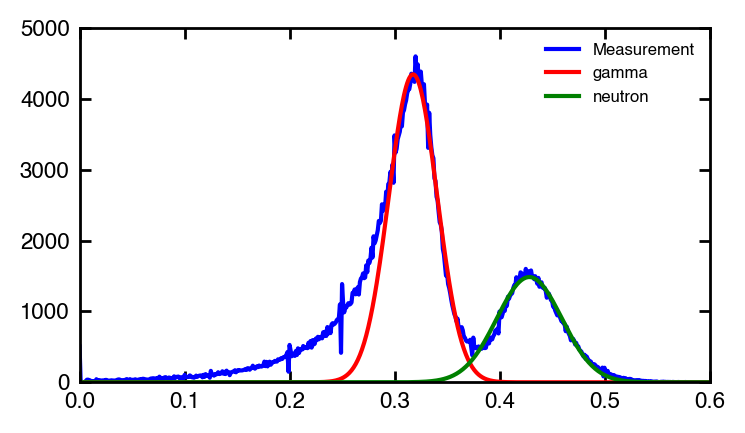

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD60,'b',label='Measurement')
ragne_60_1=np.arange(290,360,1)
ga_60_para_1 = gaussian_fit(xaxis[ragne_60_1],PSD60[ragne_60_1])
print("A, x0, sigma: ",ga_60_para_1)
ga_60_1 = gauss_wo_baseline(xaxis,ga_60_para_1[0],ga_60_para_1[1],ga_60_para_1[2])
plt.plot(xaxis,ga_60_1,'r',label='gamma')

ragne_60_2=np.arange(400,600,1)
ga_60_para_2 = gaussian_fit(xaxis[ragne_60_2],PSD60[ragne_60_2])
print("A, x0, sigma: ",ga_60_para_2)
ga_60_2 = gauss_wo_baseline(xaxis,ga_60_para_2[0],ga_60_para_2[1],ga_60_para_2[2])
plt.plot(xaxis,ga_60_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5000))
FOM_60 = abs(ga_60_para_2[1]-ga_60_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_60_para_2[2]+ga_60_para_1[2]))
print("FOM_60= ",FOM_60)

A, x0, sigma:  [4.90997072e+03 3.00365757e-01 1.88633299e-02]
A, x0, sigma:  [1.45419409e+03 4.07597694e-01 3.28581922e-02]
FOM_62=  0.8804305994040249


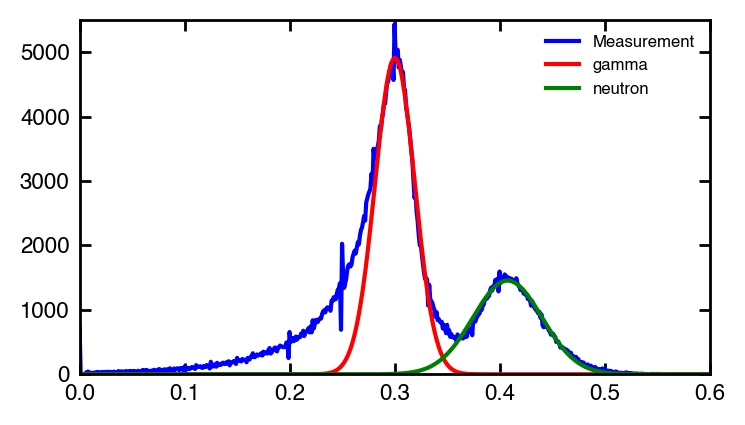

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD62,'b',label='Measurement')
ragne_62_1=np.arange(290,340,1)
ga_62_para_1 = gaussian_fit(xaxis[ragne_62_1],PSD62[ragne_62_1])
print("A, x0, sigma: ",ga_62_para_1)
ga_62_1 = gauss_wo_baseline(xaxis,ga_62_para_1[0],ga_62_para_1[1],ga_62_para_1[2])
plt.plot(xaxis,ga_62_1,'r',label='gamma')

ragne_62_2=np.arange(380,600,1)
ga_62_para_2 = gaussian_fit(xaxis[ragne_62_2],PSD62[ragne_62_2])
print("A, x0, sigma: ",ga_62_para_2)
ga_62_2 = gauss_wo_baseline(xaxis,ga_62_para_2[0],ga_62_para_2[1],ga_62_para_2[2])
plt.plot(xaxis,ga_62_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5500))
FOM_62 = abs(ga_62_para_2[1]-ga_62_para_1[1])/((2*(2*np.log(2))**0.5)*(ga_62_para_2[2]+ga_62_para_1[2]))
print("FOM_62= ",FOM_62)

A, x0, sigma:  [5.11962760e+03 2.81751545e-01 1.63674044e-02]
A, x0, sigma:  [1.46679263e+03 3.85518789e-01 3.39162357e-02]
FOM_64=  0.8763464850950816


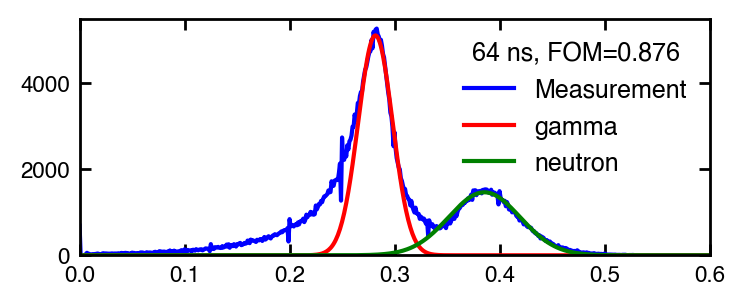

In [ ]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD64,'b',label='Measurement')
ragne_64_1=np.arange(270,310,1)
ga_64_para_1 = gaussian_fit(xaxis[ragne_64_1],PSD64[ragne_64_1])
print("A, x0, sigma: ",ga_64_para_1)
ga_64_1 = gauss_wo_baseline(xaxis,ga_64_para_1[0],ga_64_para_1[1],ga_64_para_1[2])
plt.plot(xaxis,ga_64_1,'r',label='gamma')

ragne_64_2=np.arange(360,600,1)
ga_64_para_2 = gaussian_fit(xaxis[ragne_64_2],PSD64[ragne_64_2])
print("A, x0, sigma: ",ga_64_para_2)
ga_64_2 = gauss_wo_baseline(xaxis,ga_64_para_2[0],ga_64_para_2[1],ga_64_para_2[2])
plt.plot(xaxis,ga_64_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,5500),title='64 ns, FOM=0.876',lg_fs=9)
FOM_64 = abs(ga_64_para_2[1]-ga_64_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_64_para_2[2])+abs(ga_64_para_1[2])))
print("FOM_64= ",FOM_64)

A, x0, sigma:  [5.38579991e+03 2.68496552e-01 1.45919611e-02]
A, x0, sigma:  [1.47989283e+03 3.70395292e-01 3.36837342e-02]
FOM_66=  0.8963601756921162


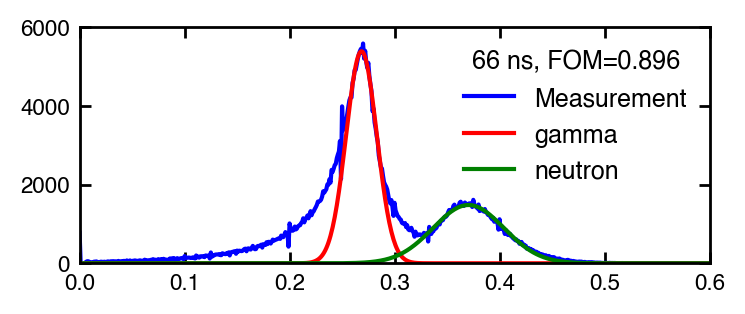

In [ ]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD66,'b',label='Measurement')
ragne_66_1=np.arange(260,290,1)
ga_66_para_1 = gaussian_fit(xaxis[ragne_66_1],PSD66[ragne_66_1])
print("A, x0, sigma: ",ga_66_para_1)
ga_66_1 = gauss_wo_baseline(xaxis,ga_66_para_1[0],ga_66_para_1[1],ga_66_para_1[2])
plt.plot(xaxis,ga_66_1,'r',label='gamma')

ragne_66_2=np.arange(330,600,1)
ga_66_para_2 = gaussian_fit(xaxis[ragne_66_2],PSD66[ragne_66_2])
print("A, x0, sigma: ",ga_66_para_2)
ga_66_2 = gauss_wo_baseline(xaxis,ga_66_para_2[0],ga_66_para_2[1],ga_66_para_2[2])
plt.plot(xaxis,ga_66_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000),title='66 ns, FOM=0.896',lg_fs=9)
FOM_66 = abs(ga_66_para_2[1]-ga_66_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_66_para_2[2])+abs(ga_66_para_1[2])))
print("FOM_66= ",FOM_66)

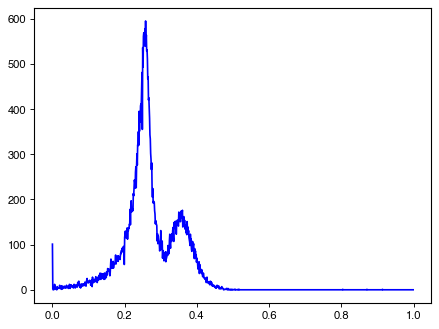

In [ ]:
plt.plot(xaxis,PSD68,'b',label='Measurement')

A, x0, sigma:  [5.32775691e+03 2.67150288e-01 1.61878803e-02]
A, x0, sigma:  [1.48809150e+03 3.70182187e-01 3.32958105e-02]
FOM_68=  0.8842028206716952


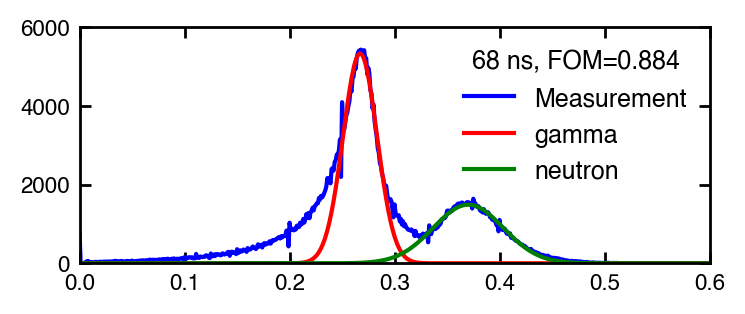

In [ ]:
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD68,'b',label='Measurement')
ragne_68_1=np.arange(250,290,1)
ga_68_para_1 = gaussian_fit(xaxis[ragne_68_1],PSD68[ragne_68_1])
print("A, x0, sigma: ",ga_68_para_1)
ga_68_1 = gauss_wo_baseline(xaxis,ga_68_para_1[0],ga_68_para_1[1],ga_68_para_1[2])
plt.plot(xaxis,ga_68_1,'r',label='gamma')

ragne_68_2=np.arange(330,600,1)
ga_68_para_2 = gaussian_fit(xaxis[ragne_68_2],PSD68[ragne_68_2])
print("A, x0, sigma: ",ga_68_para_2)
ga_68_2 = gauss_wo_baseline(xaxis,ga_68_para_2[0],ga_68_para_2[1],ga_68_para_2[2])
plt.plot(xaxis,ga_68_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,6000),title='68 ns, FOM=0.884',lg_fs = 9)
FOM_68 = abs(ga_68_para_2[1]-ga_68_para_1[1])/((2*(2*np.log(2))**0.5)*(abs(ga_68_para_2[2])+abs(ga_68_para_1[2])))
print("FOM_68= ",FOM_68)

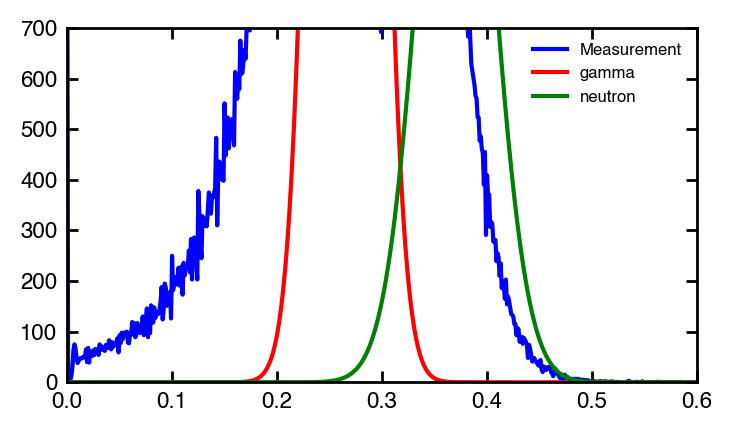

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.plot(xaxis,PSD70,'b',label='Measurement')
ragne_70_1=np.arange(210,290,1)
ga_68_para_1 = gaussian_fit(xaxis[ragne_68_1],PSD68[ragne_68_1])
ga_68_1 = gauss_wo_baseline(xaxis,ga_68_para_1[0],ga_68_para_1[1],ga_68_para_1[2])
plt.plot(xaxis,ga_68_1,'r',label='gamma')

ragne_68_2=np.arange(330,600,1)
ga_68_para_2 = gaussian_fit(xaxis[ragne_68_2],PSD68[ragne_68_2])
ga_68_2 = gauss_wo_baseline(xaxis,ga_68_para_2[0],ga_68_para_2[1],ga_68_para_2[2])
plt.plot(xaxis,ga_68_2,'g',label='neutron')

fig_post_def(xlim=(0,0.6),ylim=(0,700))